# Introduction:
A typical 4G network consists of several nodes connected to each other, where each node serves
users in the surrounding area. While users are accessing network services, their mobile phones
record Key Performance Indicators (KPI’s) which can help network operators in assessing their
quality of service.

There are many KPI’s which evaluate different aspects of the network. For example, RSRP
(Reference Signals Received Power) is a KPI which measures the network coverage in the user’s
location. Traffic Volume is another KPI which measures how much data has been consumed by the
user.

<span style="color:red">***This notebook should be run inside jupyter lab***</span>

# Importing tools:

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# The wordclouds lib
from wordcloud import WordCloud

# the interactive plotting libs
import holoviews as hv
from holoviews.operation.datashader import  inspect, rasterize
# colour maps lib
import colorcet as cc
# a lib for plotting a large dataset
import datashader as ds
# to convet the lat and lon to mercato web format
from datashader.utils import lnglat_to_meters
# panel lib for widgets and dashboards
import panel as pn
pn.extension()
hv.extension('bokeh')

# Reading Data:

In [2]:
RSRP_data = pd.read_csv("RSRP.csv")
Traffic_volumn_data = pd.read_csv("TrafficVolume.csv")

*On github the RSRP.csv file won't be provided due to its large size. A cleaned version in parquet format will be provided though.*

# EDA & Data Cleaning:

In [3]:
RSRP_data.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
1  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
2  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
3  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
4  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
5  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
6  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
7  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
8  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   
9  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   

  RadioConnectionType       Country RadioNetworkGeneration RadioOperatorName  \
0              Mobile  Saudi Arabia                     4G        Operator C   
1              Mobile  Saudi Arabia                     4G        Operator C   
2              Mobile  Saudi Arabia                     3G        Operator C   
3              Mobile  Saudi Arabia                     3G        Operator C   
4              Mobile  Saudi Arabia                     4G        Operator C   
5              Mobile  Saudi Arabia                     4G        Operator C   
6              Mobile  Saudi Arabia                     3G        Operator C   
7              Mobile  Saudi Arabia                     3G        Operator C   
8              Mobile  Saudi Arabia                     2G        Operator C   
9              Mobile  Saudi Arabia                     2G        Operator C   

         RSRP RadioMobileDataEnabled DeviceManufacturer           DeviceName  
0  2147483647                Enabled                HTC                D728W  
1  2147483647                Enabled                HTC  Desire 728 Dual Sim  
2  2147483647                Enabled                HTC                D728W  
3  2147483647                Enabled                HTC  Desire 728 Dual Sim  
4  2147483647                Enabled                HTC                D728W  
5  2147483647                Enabled                HTC  Desire 728 Dual Sim  
6  2147483647                Enabled                HTC                D728W  
7  2147483647                Enabled                HTC  Desire 728 Dual Sim  
8  2147483647                Enabled                HTC                D728W  
9  2147483647                Enabled                HTC  Desire 728 Dual Sim

In [4]:
RSRP_data.sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
2272692  2019-11-03 09:11:33.646 +0300         24.559174          46.597200   
1579998  2019-11-03 11:37:11.000 +0300         24.698746          46.567707   
1793702  2019-11-03 17:00:33.982 +0300         24.809385          46.619312   
2583152  2019-11-04 17:29:46.001 +0300         24.692177          46.718292   
188701   2019-11-02 08:10:35.887 +0300         24.693405          46.768013   
1586066  2019-11-04 18:46:29.000 +0300         24.803307          46.521935   
2264135  2019-11-03 13:21:40.000 +0300         24.730947          46.704010   
800193   2019-11-03 06:34:42.048 +0300         24.591125          46.655850   
159875   2019-11-02 13:44:19.001 +0300         24.781096          46.820786   
456926   2019-11-02 07:02:41.008 +0300         24.569641          46.618736   
2002380  2019-11-03 15:30:05.173 +0300         24.696825          46.826797   
159850   2019-11-02 13:43:11.000 +0300         24.781082          46.820797   
1231445  2019-11-02 19:49:34.000 +0300         24.678915          46.740770   
839671   2019-11-02 22:13:10.048 +0300         24.801847          46.814490   
927518   2019-11-03 11:53:49.000 +0300         24.780750          46.715416   
620062   2019-11-02 21:40:07.031 +0300         24.751345          46.677950   
2650239  2019-11-04 16:30:44.000 +0300         24.763155          46.646145   
2081382  2019-11-03 14:52:23.000 +0300         24.776110          46.684670   
1157634  2019-11-02 21:15:54.999 +0300         24.792340          46.724964   
1756310  2019-11-03 20:40:54.031 +0300         24.800093          46.718870   

        RadioConnectionType       Country RadioNetworkGeneration  \
2272692              Mobile  Saudi Arabia                     4G   
1579998              Mobile  Saudi Arabia                     4G   
1793702              Mobile  Saudi Arabia                     4G   
2583152              Mobile  Saudi Arabia                     4G   
188701               Mobile  Saudi Arabia                     4G   
1586066              Mobile  Saudi Arabia                     4G   
2264135              Mobile  Saudi Arabia                     3G   
800193               Mobile  Saudi Arabia                     4G   
159875               Mobile  Saudi Arabia                     4G   
456926               Mobile  Saudi Arabia                     4G   
2002380              Mobile  Saudi Arabia                     4G   
159850               Mobile  Saudi Arabia                     4G   
1231445              Mobile  Saudi Arabia                     4G   
839671               Mobile  Saudi Arabia                     4G   
927518               Mobile  Saudi Arabia                     4G   
620062               Mobile  Saudi Arabia                     4G   
2650239              Mobile  Saudi Arabia                     3G   
2081382              Mobile  Saudi Arabia                     4G   
1157634              Mobile  Saudi Arabia                     4G   
1756310              Mobile  Saudi Arabia                     4G   

        RadioOperatorName        RSRP RadioMobileDataEnabled  \
2272692        Operator A         -98                Enabled   
1579998        Operator A        -114                Enabled   
1793702        Operator A        -103                Enabled   
2583152        Operator C         -71                Enabled   
188701         Operator A         -93                Enabled   
1586066        Operator A         -78                Enabled   
2264135        Operator A  2147483647                Enabled   
800193         Operator A         -76                Enabled   
159875         Operator C         -76                Enabled   
456926         Operator A         -77                Enabled   
2002380        Operator B        -103                Enabled   
159850         Operator C         -76                Enabled   
1231445        Operator A        -100                Enabled   
839671         Operator A         -82       

In [5]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Timestamp               object 
 1   LocationLatitude        float64
 2   LocationLongitude       float64
 3   RadioConnectionType     object 
 4   Country                 object 
 5   RadioNetworkGeneration  object 
 6   RadioOperatorName       object 
 7   RSRP                    int64  
 8   RadioMobileDataEnabled  object 
 9   DeviceManufacturer      object 
 10  DeviceName              object 
dtypes: float64(2), int64(1), object(8)
memory usage: 228.7+ MB


In [6]:
# let's look at the 'Country' column, seems all the values are Saudi Arabia
RSRP_data["Country"].value_counts()

Saudi Arabia    2725197
Name: Country, dtype: int64

**Since There's only one value in this column, it should be removed since it does not contain much information.**

In [7]:
#There only one value in the Country column, it's better to remove that column to simplify our data
RSRP_data.drop("Country", axis=1, inplace=True)

In [8]:
# let's look at the 'RadioConnectionType' column, seems all the values are Mobile
RSRP_data["RadioConnectionType"].value_counts()

Mobile     2717295
WiFi          7390
Unknown        668
Name: RadioConnectionType, dtype: int64

**Note:**
We have way more mobile instances than the other but still we can't delete the column like we did before.

In [9]:
RSRP_data["RadioMobileDataEnabled"].value_counts()

Enabled     2724635
Disabled        718
Name: RadioMobileDataEnabled, dtype: int64

**Again**, there is a class that is dominating and a few instances of the other.
We can't drop this column too, but data must be prepared if a classification will be used becuase of how skwed our dataset is towards a specific class. 

In [10]:
# let's take a look at the RadioNetworkGeneration
RSRP_data["RadioNetworkGeneration"].value_counts()

4G         2257240
3G          445246
Unknown      17361
2G            5464
WiFi            42
Name: RadioNetworkGeneration, dtype: int64

**4G domination!**

In [11]:
# let's take a look at the manufacturer
RSRP_data["DeviceManufacturer"].value_counts()

samsung       2404478
HUAWEI         111972
HTC             36046
LGE             30428
Xiaomi          25612
HMD Global      23497
motorola        19909
LENOVO          18679
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Lenovo           5862
Sony             4040
lenovo           3517
Realme           1760
realme           1598
PANASONIC        1224
QMobile           723
htc               578
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**There are things to notice here:**
- Samsung domination!
- Some manufacturer have different names for example: there's ( **Realme**, **realme** | **Lenovo**, **lenovo**, **LENOVO** | **HTC**, **htc** ). If we wish we can even join Realme, vivo, Oppo into one category since these belong to a single company.
- Another thing to notice here is the LGE manufacturer, this refers to the LG company. 


*Let's rename this to the most common name and name the duplicates with one exact name.*

In [12]:
RSRP_data["DeviceManufacturer"].replace("Realme", "realme", inplace=True)
RSRP_data["DeviceManufacturer"].replace("lenovo", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LENOVO", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("htc", "HTC", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LGE", "LG", inplace=True)
RSRP_data["DeviceManufacturer"].replace("samsung", "SAMSUNG", inplace=True)

In [13]:
RSRP_data["DeviceManufacturer"].value_counts()

SAMSUNG       2404478
HUAWEI         111972
HTC             36624
LG              30428
Lenovo          28058
Xiaomi          25612
HMD Global      23497
motorola        19909
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Sony             4040
realme           3358
PANASONIC        1224
QMobile           723
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**Now Lenovo is looking big!**

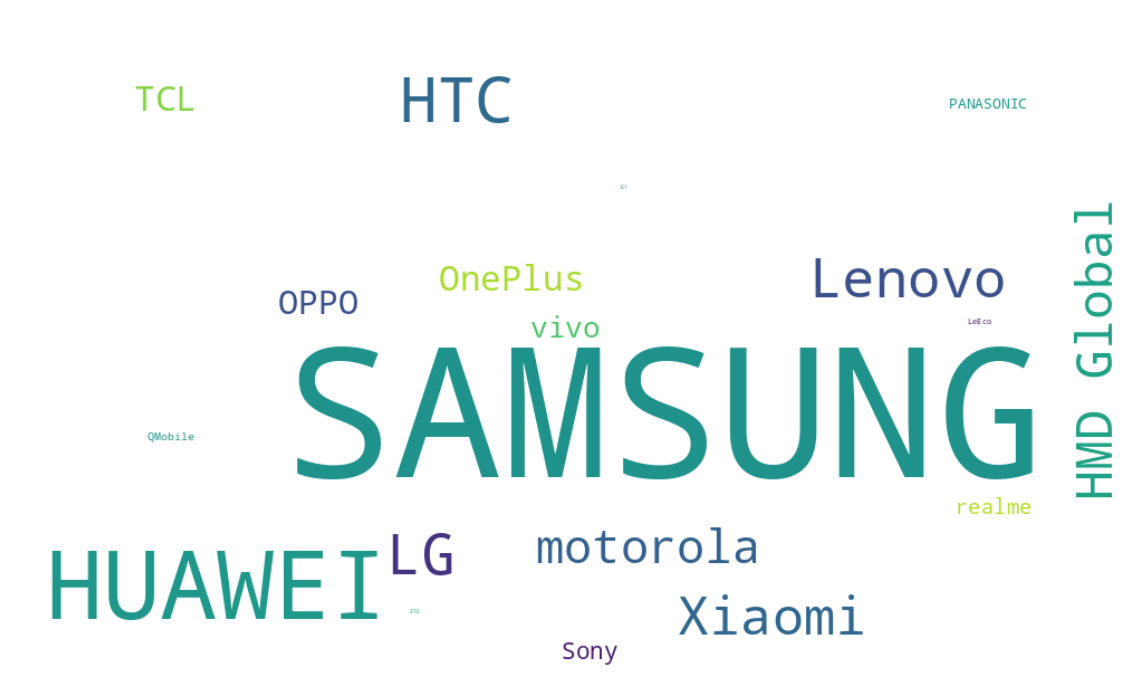

In [14]:
# Another way of plotting these values is by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceManufacturer"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This visual shows how each class weight in a simple visualization.

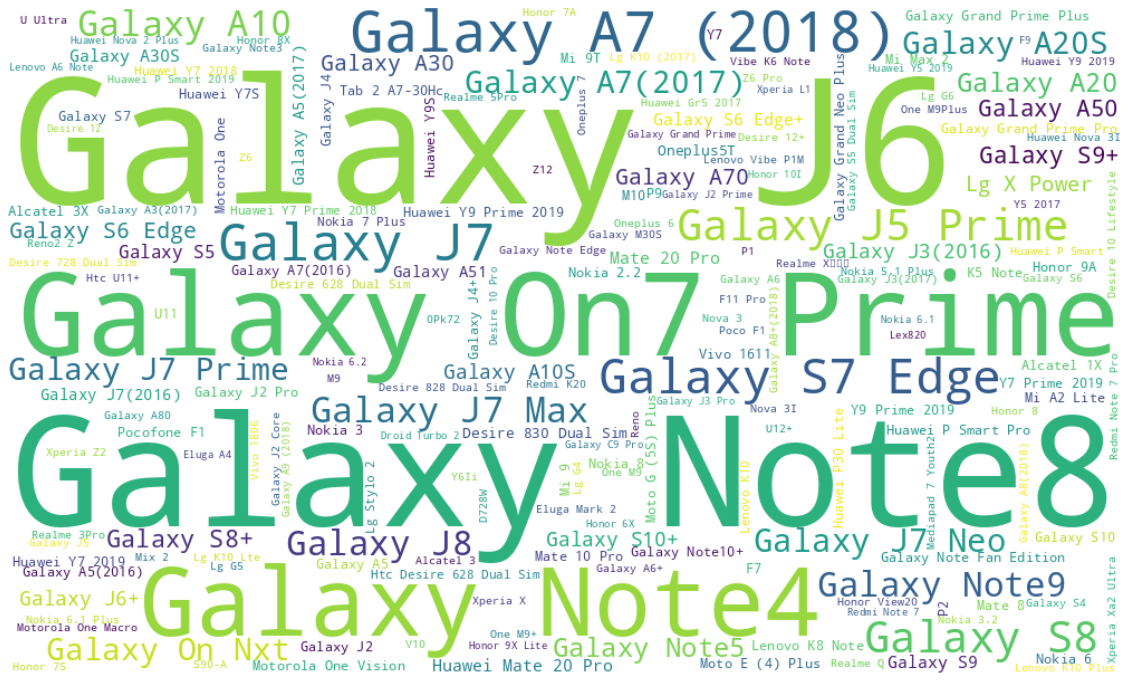

In [15]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

**Now**, the *'Timestamp'* column must be converted to the datetime datatype in pandas. The *'to_datetime'* method is used with the format parameter provided, this helps in making the conversion process quick and more accurate. The formate of the datatime can be deduced from the dataset. Pandas provides a nice way to represent the time in way similar to regex.

In [16]:
# Now let's convert the TimeStamp column to datetime type in pandas, the 'utc' parameter is essential here for this to work!
RSRP_data["Timestamp"] = pd.to_datetime(RSRP_data["Timestamp"], format="%Y-%m-%d %H:%M:%S.%f%z", utc=True)

In [17]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 10 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Timestamp               datetime64[ns, UTC]
 1   LocationLatitude        float64            
 2   LocationLongitude       float64            
 3   RadioConnectionType     object             
 4   RadioNetworkGeneration  object             
 5   RadioOperatorName       object             
 6   RSRP                    int64              
 7   RadioMobileDataEnabled  object             
 8   DeviceManufacturer      object             
 9   DeviceName              object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(6)
memory usage: 207.9+ MB


Looking at the Timestamp column, the dtype of Timestamp is now a datetime type

Now let's check our numerical fields to check that they are in the valid range

The valid range for latitude is between +90 and -90, any values outside this range are invalid

In [18]:
RSRP_data[(RSRP_data['LocationLatitude'] > 90) | (RSRP_data['LocationLatitude'] < -90)].value_counts().sum()

0

**All latitude values are valid!**

The valid range for longitude is between +180 and -180, any values outside this range are invalid

In [19]:
RSRP_data[(RSRP_data['LocationLongitude'] > 180) | (RSRP_data['LocationLongitude'] < -180)].value_counts().sum()

0

**All longtitude values are valid!**

There something weird with the RSRP column here, there's a very big positive value and the rest are small negative ones.

The valid range for RSRP is [-44,-140]
Let's look up the invalid values.

In [20]:
RSRP_data_invalid = RSRP_data[(RSRP_data['RSRP'] > -44) | (RSRP_data['RSRP'] < -140)]
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 2147483647]

Timestamp  LocationLatitude  LocationLongitude  \
0       2019-11-01 21:09:29.386000+00:00         24.540540          46.784737   
1       2019-11-01 21:09:29.386000+00:00         24.540540          46.784737   
2       2019-11-01 21:10:45.323000+00:00         24.540540          46.784737   
3       2019-11-01 21:10:45.323000+00:00         24.540540          46.784737   
4       2019-11-01 21:11:26.822000+00:00         24.540540          46.784737   
...                                  ...               ...                ...   
2724318        2019-11-02 15:59:42+00:00         24.723953          46.669780   
2725269 2019-11-03 08:35:23.171000+00:00         24.812200          46.752940   
2725270 2019-11-03 08:35:32.550000+00:00         24.812200          46.752940   
2725316 2019-11-03 13:50:06.017000+00:00         24.812235          46.752796   
2725325 2019-11-03 14:25:19.527000+00:00         24.812230          46.752800   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
0                    Mobile                     4G        Operator C   
1                    Mobile                     4G        Operator C   
2                    Mobile                     3G        Operator C   
3                    Mobile                     3G        Operator C   
4                    Mobile                     4G        Operator C   
...                     ...                    ...               ...   
2724318              Mobile                     4G        Operator C   
2725269              Mobile                     3G        Operator A   
2725270              Mobile                     4G        Operator A   
2725316              Mobile                     3G        Operator A   
2725325              Mobile                     3G        Operator A   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
0        2147483647                Enabled                HTC   
1        2147483647                Enabled                HTC   
2        2147483647                Enabled                HTC   
3        2147483647                Enabled                HTC   
4        2147483647                Enabled                HTC   
...             ...                    ...                ...   
2724318  2147483647                Enabled            SAMSUNG   
2725269  2147483647                Enabled            SAMSUNG   
2725270  2147483647                Enabled            SAMSUNG   
2725316  2147483647                Enabled            SAMSUNG   
2725325  2147483647                Enabled            SAMSUNG   

                  DeviceName  
0                      D728W  
1        Desire 728 Dual Sim  
2                      D728W  
3        Desire 728 Dual Sim  
4                      D728W  
...                      ...  
2724318        Galaxy On Nxt  
2725269          Galaxy A20S  
2725270          Galaxy A20S  
2725316          Galaxy A20S  
2725325          Galaxy A20S  

[643705 rows x 10 columns]

***A huge number of invalid data points for RSRP values, however it's better not to drop these datapoints now, these rows still contain useful information that we can use.***

This data contains longtitude and latitude, we were informed that this data is from Saudi Arabia, but we don't know which part of Saudi Arabia. These points can be plotted and using a refrence point (drawn using a red traingle) and google maps or openstreetmaps, we can find the area from which this data came.

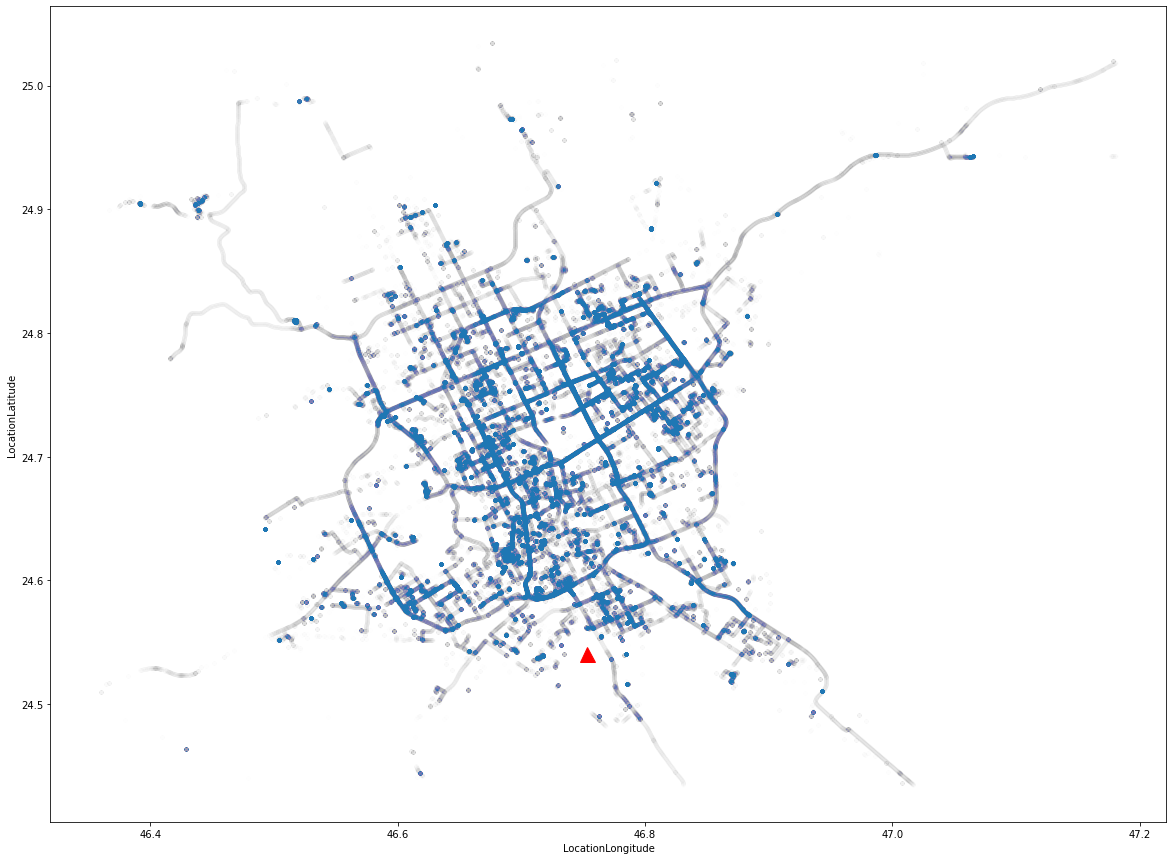

In [21]:
RSRP_data_invalid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***By looking at the google maps and using the red point as a refrence point we can see that this is map of Riyad city.***
<img src="riyad.png"/>

*Now let's look at our valid data:*

In [22]:
RSRP_data_valid = RSRP_data[(RSRP_data['RSRP'] < -44) & (RSRP_data['RSRP'] > -140)]
RSRP_data_valid.sample(40)

Timestamp  LocationLatitude  LocationLongitude  \
1811244 2019-11-04 16:46:21.301000+00:00         24.781263          46.587013   
2497263        2019-11-04 17:02:10+00:00         24.766434          46.713870   
844337  2019-11-02 23:54:09.026000+00:00         24.592426          46.715570   
1681859 2019-11-04 11:52:25.070000+00:00         24.801823          46.739037   
1706192 2019-11-03 13:17:57.049000+00:00         24.543812          46.692074   
65392          2019-11-02 04:13:50+00:00         24.832508          46.759460   
1324624 2019-11-03 17:02:10.980000+00:00         24.817446          46.665497   
2246679 2019-11-03 06:01:01.786000+00:00         24.759703          46.673890   
594646         2019-11-02 18:38:35+00:00         24.564833          46.535275   
797396  2019-11-03 12:44:26.053000+00:00         24.802000          46.739494   
139766  2019-11-02 15:58:18.963000+00:00         24.575737          46.791016   
882987         2019-11-03 03:49:11+00:00         24.729809          46.719593   
2159510        2019-11-04 08:12:51+00:00         24.728730          46.641003   
2357486 2019-11-04 11:09:37.020000+00:00         24.694300          46.784264   
78538   2019-11-02 15:34:51.217000+00:00         24.552309          46.699400   
2490424 2019-11-04 10:17:49.045000+00:00         24.688368          46.644720   
2497828 2019-11-04 03:33:21.027000+00:00         24.826902          46.779713   
1507812 2019-11-04 08:19:04.999000+00:00         24.782001          46.816635   
1602266 2019-11-04 11:48:13.001000+00:00         24.767473          46.787840   
2131070 2019-11-03 19:29:57.787000+00:00         24.816774          46.644848   
336687  2019-11-02 10:41:03.999000+00:00         24.653727          46.744255   
2147650 2019-11-03 12:44:59.027000+00:00         24.597143          46.615814   
2130786        2019-11-03 19:04:48+00:00         24.703798          46.700733   
808371         2019-11-02 19:59:34+00:00         24.843718          46.867924   
265782         2019-11-02 02:17:21+00:00         24.832384          46.759705   
1085311 2019-11-02 16:42:27.982000+00:00         24.641682          46.703480   
1298912 2019-11-02 19:34:02.001000+00:00         24.843752          46.867905   
1019670 2019-11-03 05:23:24.042000+00:00         24.548140          46.710900   
2640857 2019-11-04 16:54:55.042000+00:00         24.734535          46.663643   
1263186 2019-11-02 13:11:26.001000+00:00         24.653284          46.619550   
1861487        2019-11-04 13:23:52+00:00         24.742651          46.644510   
2679419 2019-11-04 18:56:44.034000+00:00         24.621628          46.703556   
1886486        2019-11-03 11:20:15+00:00         24.794914          46.742825   
930580  2019-11-03 17:25:57.001000+00:00         24.763508          46.700073   
2372811        2019-11-04 17:25:23+00:00         24.844020          46.685630   
1635483 2019-11-03 13:23:35.940000+00:00         24.711401          46.764736   
1974805 2019-11-04 06:51:16.001000+00:00         24.628761          46.715286   
2555616 2019-11-04 18:11:03.079000+00:00         24.596690          46.680576   
1995550 2019-11-03 23:31:36.093000+00:00         24.596670          46.680603   
1093497        2019-11-02 09:23:42+00:00         24.743383          46.791134   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
1811244              Mobile                     4G        Operator A  -102   
2497263              Mobile                     4G        Operator C   -69   
844337               Mobile                     4G        Operator A   -75   
1681859              Mobile                     4G        Operator A  -107   
1706192              Mobile                     4G        Operator B   -70   
65392                Mobile                     4G        Operator C   -62   
1324624              Mobile                     4G        Operator B   -68   
2246679              Mobile                     4G        Operator B   -92   
594646 

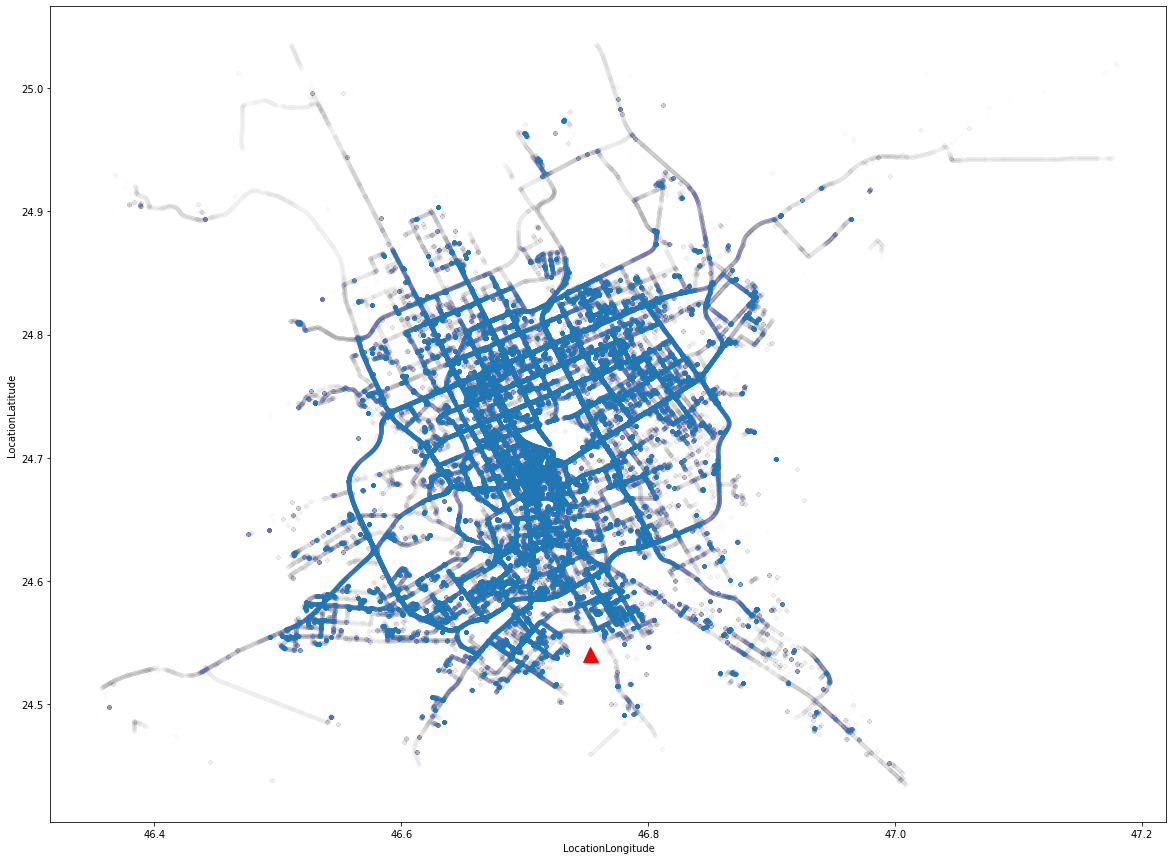

In [23]:
RSRP_data_valid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***Another map of Riyad.***

We can see that the devices with the invalid RSRP value are distributed as much as the ones with a valid RSRP value, i.e there's no areas which appear on a map but not the other. We can't link these invalid values to a certain area or location, furthur investegation is needed.

In [24]:
RSRP_data_invalid.sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
2087839 2019-11-04 13:09:15.038000+00:00         24.787207          46.634260   
1852083        2019-11-03 08:17:07+00:00         24.755547          46.741530   
105895  2019-11-02 05:38:52.020000+00:00         24.784325          46.726154   
1406973 2019-11-03 04:15:11.733000+00:00         24.893700          46.610325   
613625  2019-11-03 15:50:40.078000+00:00         24.779010          46.707127   
1841148 2019-11-04 06:53:41.049000+00:00         24.853853          46.864376   
343801  2019-11-02 04:01:13.032000+00:00         24.717102          46.761520   
2213745 2019-11-03 19:29:52.030000+00:00         24.809082          46.866040   
651550  2019-11-02 11:50:31.018000+00:00         24.769983          46.797386   
919280         2019-11-03 07:37:35+00:00         24.675074          46.622707   
2210222 2019-11-03 14:36:25.030000+00:00         24.807104          46.769490   
1637483 2019-11-03 14:34:43.024000+00:00         24.706530          46.718470   
2070652 2019-11-03 16:37:46.024000+00:00         24.719944          46.814327   
1991591 2019-11-04 05:56:21.029000+00:00         24.822450          46.799473   
1763867 2019-11-03 19:21:01.080000+00:00         24.559374          46.867080   
2363718 2019-11-04 15:04:34.037000+00:00         24.706968          46.769684   
2021448        2019-11-02 17:23:24+00:00         24.692577          46.681420   
2072510 2019-11-03 18:46:21.030000+00:00         24.807346          46.769993   
1138541 2019-11-02 20:32:17.024000+00:00         24.679222          46.856995   
2428146        2019-11-04 20:30:10+00:00         24.790854          46.781773   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
2087839              Mobile                     4G        Operator A   
1852083              Mobile                     3G        Operator A   
105895               Mobile                     4G        Operator C   
1406973              Mobile                     4G        Operator B   
613625               Mobile                     3G        Operator A   
1841148              Mobile                     4G        Operator B   
343801               Mobile                     4G        Operator C   
2213745              Mobile                     3G        Operator B   
651550               Mobile                     3G        Operator B   
919280               Mobile                     3G        Operator A   
2210222              Mobile                     3G        Operator B   
1637483              Mobile                     4G        Operator A   
2070652              Mobile                     3G        Operator B   
1991591              Mobile                     3G        Operator C   
1763867              Mobile                     2G        Operator A   
2363718              Mobile                     4G        Operator B   
2021448              Mobile                     4G        Operator B   
2072510              Mobile                     3G        Operator B   
1138541              Mobile                     4G        Operator B   
2428146              Mobile                     3G        Operator A   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
2087839  2147483647                Enabled            SAMSUNG   
1852083  2147483647                Enabled            SAMSUNG   
105895   2147483647                Enabled            SAMSUNG   
1406973  2147483647                Enabled            SAMSUNG   
613625   2147483647                Enabled            SAMSUNG   
1841148  2147483647                Enabled            SAMSUNG   
343801   2147483647                Enabled            SAMSUNG   
2213745  2147483647                Enabled            SAMSUNG   
651550   2147483647                Enabled            SAMSUNG   
919280   2147483647                Enabled            SAMSUNG   
2210222  2147483647                Enabled            SAMSUNG   
1637483  2147483647                E

In [25]:
RSRP_data_invalid["DeviceManufacturer"].value_counts()

SAMSUNG       598200
Lenovo         12956
HUAWEI         10099
motorola        4743
HTC             3876
LG              3025
OnePlus         2547
HMD Global      2442
Sony            1934
Xiaomi          1199
OPPO             855
vivo             546
QMobile          535
PANASONIC        496
TCL              324
realme           168
E1               135
Hisense           40
OBI                9
Mione              9
Infinix            8
ZTE                6
LAVA               6
SHARP              5
Name: DeviceManufacturer, dtype: int64

By looking at these numbers and the number for the whole dataset, the issue seems to be happening across all types of devices and not specific to a type. The order of the devices manufacturer is almost the same.

In [26]:
RSRP_data_invalid['RSRP'].value_counts()

 2147483647    643705
 0                455
-1                  2
 12                 1
Name: RSRP, dtype: int64

In [27]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0].sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
141863  2019-11-02 11:27:33.090000+00:00         24.827147          46.592200   
299764  2019-11-02 11:27:08.037000+00:00         24.824163          46.593740   
299906  2019-11-02 11:30:31.042000+00:00         24.828835          46.571730   
299786  2019-11-02 11:27:39.034000+00:00         24.827568          46.591976   
10074   2019-11-02 14:31:46.025000+00:00         24.629990          46.717190   
2106195 2019-11-04 07:12:00.258000+00:00         24.491034          46.777874   
2711753 2019-11-03 13:59:57.025000+00:00         24.664005          46.733074   
9979    2019-11-02 11:32:05.042000+00:00         24.827587          46.566470   
141850  2019-11-02 11:27:02.038000+00:00         24.823420          46.594112   
299994  2019-11-02 11:34:17.010000+00:00         24.826878          46.564720   
141788  2019-11-02 11:24:30.054000+00:00         24.827686          46.611874   
2354862 2019-11-04 16:49:34.610000+00:00         24.648975          46.558850   
10041   2019-11-02 11:35:29.038000+00:00         24.826971          46.565083   
299812  2019-11-02 11:28:25.038000+00:00         24.833060          46.589127   
141903  2019-11-02 11:29:44.076000+00:00         24.832070          46.579533   
141798  2019-11-02 11:24:57.049000+00:00         24.824373          46.608017   
9928    2019-11-02 11:29:33.087000+00:00         24.832880          46.581413   
141776  2019-11-02 11:23:51.026000+00:00         24.832340          46.610820   
9917    2019-11-02 11:28:49.046000+00:00         24.835400          46.587845   
141823  2019-11-02 11:25:55.039000+00:00         24.820911          46.600174   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
141863               Mobile                     4G        Operator A     0   
299764               Mobile                     4G        Operator A     0   
299906               Mobile                     4G        Operator A     0   
299786               Mobile                     4G        Operator A     0   
10074                Mobile                     4G        Operator A     0   
2106195              Mobile                     3G        Operator A     0   
2711753              Mobile                     4G        Operator A     0   
9979                 Mobile                     4G        Operator A     0   
141850               Mobile                     4G        Operator A     0   
299994               Mobile                     4G        Operator A     0   
141788               Mobile                     4G        Operator A     0   
2354862              Mobile                     4G        Operator A     0   
10041                Mobile                     4G        Operator A     0   
299812               Mobile                     4G        Operator A     0   
141903               Mobile                     4G        Operator A     0   
141798               Mobile                     4G        Operator A     0   
9928                 Mobile                     4G        Operator A     0   
141776               Mobile                     4G        Operator A     0   
9917                 Mobile                     4G        Operator A     0   
141823               Mobile                     4G        Operator A     0   

        RadioMobileDataEnabled DeviceManufacturer DeviceName  
141863                 Enabled             HUAWEI       Y6Ii  
299764                 Enabled             HUAWEI       Y6Ii  
299906                 Enabled             HUAWEI       Y6Ii  
299786                 Enabled             HUAWEI       Y6Ii  
10074                  Enabled             HUAWEI       Y6Ii  
2106195                Enabled             HUAWEI     Mate 8  
2711753                Enabled             HUAWEI       Y6Ii  
9979                   Enabled             HUAWEI       Y6Ii  
141850                 Enabled             HUAWEI       Y6Ii  
299994                 Enabled             HUAWEI       Y6Ii

Reporting a 0 for the RSRP value seems to be an issue for HUAWEI Y6li model. By searching online, the large positive value, 2147483647, is the largest number an integer can hold (according to android documentation), and it's reported by android devices when the RSRP value isn't avaliable on the device (due to congestion and other factors). But a 0 value is unexpected.

In [28]:
RSRP_data[RSRP_data["DeviceName"] == "Y6Ii"]["DeviceName"].value_counts()

Y6Ii    1009
Name: DeviceName, dtype: int64

In [29]:
RSRP_data_invalid[RSRP_data_invalid["DeviceName"] == "Y6Ii"]["DeviceName"].value_counts()

Y6Ii    429
Name: DeviceName, dtype: int64

In [30]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0]["DeviceManufacturer"].value_counts()

HUAWEI    455
Name: DeviceManufacturer, dtype: int64

We can see that this an issue onlt happening with HUAWEI devices and especially the model Y6li

In [31]:
RSRP_data_invalid["DeviceName"].value_counts()

Galaxy A7 (2018)    103799
Galaxy J6            69785
Galaxy On7 Prime     47702
Galaxy Note4         45088
Galaxy S7 Edge       31853
                     ...  
P20Pro                   1
P20 Pro                  1
Z6 Pro                   1
Z6                       1
Redmi Note 8 Pro         1
Name: DeviceName, Length: 255, dtype: int64

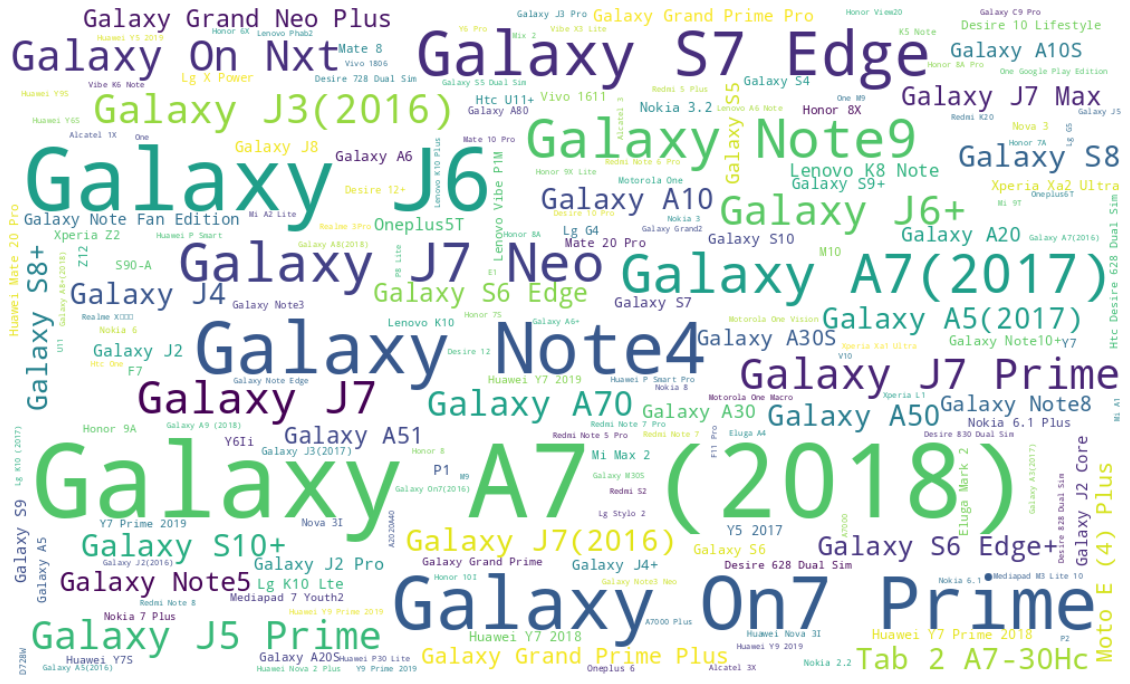

In [32]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data_invalid["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This is a wordcloud of the invalid RSRP values devices.
For the most part devices are with same distribution.

# Plotting:
We should plot this data in a better way without overplotting or undersampling. This can be achieved using the holoviews ecosystem with its libraries like datashader, holoviews.pandas, hvplot and colorcet

In [33]:
# Don't use the 'TimeStamp' as an index because there are duplicates!
RSRP_data_time_sorted = RSRP_data.sort_values(by="Timestamp", ignore_index=True)
# RSRP_data_valid_time_sorted = RSRP_data_valid_time_sorted.set_index("Timestamp")
RSRP_data_time_sorted.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0 2019-11-01 18:15:32.097000+00:00         24.639421           46.73017   
1 2019-11-01 18:15:32.505000+00:00         24.639421           46.73017   
2 2019-11-01 18:15:50.376000+00:00         24.639421           46.73017   
3 2019-11-01 18:20:11.389000+00:00         24.639421           46.73017   
4 2019-11-01 18:20:12.035000+00:00         24.639421           46.73017   
5 2019-11-01 18:20:13.264000+00:00         24.639421           46.73017   
6 2019-11-01 18:20:16.996000+00:00         24.639421           46.73017   
7 2019-11-01 18:21:45.695000+00:00         24.639421           46.73017   
8 2019-11-01 18:22:37.206000+00:00         24.639421           46.73017   
9 2019-11-01 18:36:43.521000+00:00         24.626589           46.68925   

  RadioConnectionType RadioNetworkGeneration RadioOperatorName        RSRP  \
0              Mobile                     4G        Operator B        -110   
1              Mobile                     4G        Operator B        -106   
2              Mobile                     4G        Operator B         -93   
3              Mobile                     4G        Operator B        -107   
4              Mobile                     4G        Operator B        -111   
5              Mobile                     4G        Operator B        -106   
6              Mobile                     3G        Operator B  2147483647   
7              Mobile                     3G        Operator B  2147483647   
8              Mobile                     4G        Operator B         -98   
9              Mobile                     4G        Operator C         -95   

  RadioMobileDataEnabled DeviceManufacturer               DeviceName  
0                Enabled            SAMSUNG           Galaxy S7 Edge  
1                Enabled            SAMSUNG           Galaxy S7 Edge  
2                Enabled            SAMSUNG           Galaxy S7 Edge  
3                Enabled            SAMSUNG           Galaxy S7 Edge  
4                Enabled            SAMSUNG           Galaxy S7 Edge  
5                Enabled            SAMSUNG           Galaxy S7 Edge  
6                Enabled            SAMSUNG           Galaxy S7 Edge  
7                Enabled            SAMSUNG           Galaxy S7 Edge  
8                Enabled            SAMSUNG           Galaxy S7 Edge  
9                Enabled            SAMSUNG  Galaxy Grand Prime Plus

In [34]:
df = RSRP_data.copy()

# This step is needed to prepare the data to be plotted on the map
df["LocationLongitude"], df["LocationLatitude"] = lnglat_to_meters(df["LocationLongitude"], df["LocationLatitude"])

In [35]:
# Using the map tiles provided by Esri. OpenStreetMaps can be used as well
# map_tiles = EsriImagery().opts( alpha=0.3, width=1000, height=700, bgcolor='black')

# users_points = hv.Points(RSRP_data_houred, ['LocationLongitude', 'LocationLatitude'])
# # downsampling using datashader
# shaded = hv.operation.datashader.datashade(users_points, cmap=cc.fire, width=1000, height=700)

# # plotting the points over a map provided by the tiles elements 
# map_tiles * shaded

# plot = RSRP_data_houred.hvplot.scatter("LocationLongitude",
#                                 "LocationLatitude",
#                                 rasterize=True,
#                                 cmap=cc.fire,
#                                 cnorm='eq_hist',
#                                 colorbar=False,
#                                 xaxis=None,
#                                 yaxis=None,
#                                 )
# map_tiles * plot 

# pointsA =  hv.Points(df[df["RadioOperatorName"] == "Operator A"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterA = hv.operation.datashader.rasterize(pointsA).opts(cmap=cc.kr, cnorm="eq_hist", width=1000)
# highlightA = hv.operation.datashader.inspect(rasterA).opts(marker="o", size=10, fill_alpha=0, color='red', tools=["hover"])4
    
# pointsB =  hv.Points(df[df["RadioOperatorName"] == "Operator B"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterB = hv.operation.datashader.rasterize(pointsB).opts(cmap=cc.kb, cnorm="eq_hist", width=1000)
# highlightB = hv.operation.datashader.inspect(rasterB).opts(marker="o", size=10, fill_alpha=0, color='green', tools=["hover"])

# pointsC =  hv.Points(df[df["RadioOperatorName"] == "Operator C"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterC = hv.operation.datashader.rasterize(pointsC).opts(cmap=cc.kg, cnorm="eq_hist", width=1000)
# highlightC = hv.operation.datashader.inspect(rasterC).opts(marker="o", size=10, fill_alpha=0, color='blue', tools=["hover"])

# esri  * rasterB * highlightB * rasterC * highlightC* rasterA * highlightA

esri = hv.element.tiles.ESRI().redim(x="Longtitude", y="Latitude").opts(alpha=0.2, width=1000, height=700, bgcolor='black')
COLORS = {"Operator A": cc.kr, "Operator B": cc.kg, "Operator C": cc.kb}

def operator_map(operator_name):
    df_operator = df[df["RadioOperatorName"] == operator_name].copy()
    if (len(df_operator) == 0 ):
        return esri
    operator_points =  hv.Points(df_operator, kdims=["LocationLongitude", "LocationLatitude"])
    rastered = rasterize(operator_points).opts(cmap=COLORS[operator_name], cnorm="eq_hist",  width=1000, height=700)
    operator_highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
    return esri * rastered * operator_highlight
    
operator_select = pn.widgets.RadioButtonGroup(options=list(COLORS.keys()))
interactive = pn.bind(operator_map, operator_select)
first_app = pn.Column(operator_select, interactive)
first_app

Column
    [0] RadioButtonGroup(options=['Operator A', ...], value='Operator A')
    [1] ParamFunction(function)

In this map we can see the how speard every operator users are and which areas are a hotspot, <span style="color:red">*Operator A*</span> is show in <span style="color:red">*red*</span>, <span style="color:green">*Operator B*</span> is show in <span style="color:green">*green*</span>, <span style="color:blue">*Operator C*</span> is show in <span style="color:blue">*blue*</span>.

In [36]:
points =  hv.Points(df, kdims=["LocationLongitude", "LocationLatitude"])
rastered = rasterize(points).opts(cmap=cc.fire, cnorm="eq_hist", width=1000, height=700)
highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
esri * rastered * highlight 

:DynamicMap   []
   :Overlay
      .Tiles.I  :Tiles   [Longtitude,Latitude]
      .Image.I  :Image   [LocationLongitude,LocationLatitude]   (LocationLongitude_LocationLatitude Count)
      .Points.I :Points   [LocationLongitude,LocationLatitude]   (Timestamp,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName)

This is a plot of the whole dataset we have for all the operators over the whole period we have.

After cleaning the data is better to save it in a new file, so we don't have to go through all of this processing again if we needed to do more processing.
I'll use a better format than CSV called Parquet, it's built-in pandas only requires the installation of fastparquet library.

In [37]:
print(RSRP_data_time_sorted.shape)

(2725353, 10)


In [38]:
RSRP_data_time_sorted.drop_duplicates(inplace=True)

In [39]:
print(RSRP_data_time_sorted.shape)

(2723541, 10)


In [40]:
cols = [
       "RadioConnectionType",
       "RadioNetworkGeneration",
       "RadioOperatorName",
       "RadioMobileDataEnabled",
       "DeviceManufacturer",
       "DeviceName"
      ]
RSRP_data_time_sorted[cols] = RSRP_data_time_sorted[cols].astype('category')

RSRP_data_time_sorted dataframe is now more ready for ML algorithms

In [41]:
RSRP_data_time_sorted.to_parquet("./Data/RSRP_data_processed.parq")